In [ ]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

# Sherlock Pandas und Data Watson

## Daten mit deskriptiven Statistiken verstehen 

Da Sie nun wissen, wie Sie Ihre Daten laden, möchten wir Ihnen nun einige Werkzeuge an die Hand geben, mit denen Sie sich einen schnellen Überblick über Ihre Daten verschaffen können. Damit können Sie entscheiden, wie Sie das meiste aus ihnen herausholen können.
 
Sie können entweder einen Blick auf die Daten werfen, indem Sie sie öffnen (zum Beispiel in Excel), oder indem das Paket pandas verwenden. Der Pandas Dataframe hat dazu die Methode `.head()`, mit der Sie einen Blick auf die Rohdaten werfen können. 

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.1:</b> Schreiben Sie einen Code, der die ersten 20 Zeilen des Datensatzes ausgibt. Dazu kann das data Objekt direkt verwendet werden.

</div>

In [1]:
from pandas import read_csv
import pandas as pd

filename = 'data/pima-indians-diabetes.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(type(data)) # Get the columns and rows. Format:(rows, cols)
### STUDENT CODE HERE
data.head(20)
### STUDENT CODE until HERE

<class 'pandas.core.frame.DataFrame'>


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<div class="alert alert-block alert-success">
<b>Frage 1.3.2:</b> Wofür stehen die verschiedenen abgekürzten Features (preg, plas usw.) in dem Datensatz?
</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Genauere Informationen zum verwendeten Datensatz finden Sie hier: https://www.kaggle.com/uciml/pima-indians-diabetes-database
</div>
    
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div> Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree, Age, Outcome


Im ersten Kapitel haben Sie bereits gelernt, wie Sie verschiedene Datentypen konvertieren können. Bevor Sie aber mit dem Konvertieren beginnen können, müssen Sie herausfinden, welche Datentypen zurzeit vorliegen. Das Pandas `dtypes` Attribut gibt den Datentyp jeder Spalte aus.

In [2]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

### Deskriptive Statistik

Da wir nun eine grobe Übersicht über unseren Datensatz haben (Form, erste Zeilen und Datentypen des Datensatzes), ist es an der Zeit, mehr über die Eigenschaften heraus zu finden und die Frage zu klären, was sich hinter den einzelnen Variablen verbirgt. Dadurch wird es später auch möglich sein, abzuschätzen, ob der Algorithmus richtig funktioniert.

Die `describe` Funktion gibt 8 statistische Eigenschaften für jedes Attribut aus.

_Anzahl, Mittelwert, Standardabweichung, Minimum, 25. Perzentil, 50. Perzentil (Median), 75. Perzentil und Maximum_

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.3:</b> Wenden Sie die describe Funktion auf den Datensatz an. 
<ul>
    <li> Hinweis: Benutzen Sie die Pandas <code>set_option</code> Funktion für eine sinnvolle Genauigkeit des Outputs. Ein Attribut kann durch ('Attribut', Wert) gesetzt werden.

</ul>
</div>

In [5]:
from pandas import set_option
set_option("display.precision", 2)
### STUDENT CODE HERE
description = data.describe()

### STUDENT CODE until HERE

print(description)

         preg    plas    pres    skin    test    mass    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   79.80   31.99    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95  115.24    7.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00    0.00    0.00    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00    0.00   27.30    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   30.50   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00  127.25   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00  846.00   67.10    2.42   81.00    1.00


### Klassenverteilung

In der Regel sind die Daten von Anfang an nicht ausgewogen, sodass eine Klasse häufiger als eine andere auftritt. Dies erfordert in der Regel einen gesonderten Umgang mit den Daten in der Datenaufbereitung. Um einen schnellen Einblick auf den Status der Daten zu erhalten, können sie nach einem Attribut sortiert werden.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.4:</b> Schreiben Sie einen Code, der das Auftreten jeder Klasse in der 'class' Spalte zählt und speichern Sie diese Anzahl in der Variable <code>class_count</code>.
</div>

In [7]:
### STUDENT CODE HERE
class_counts = data['class'].value_counts()

### STUDENT CODE until HERE

print(class_counts)

0    500
1    268
Name: class, dtype: int64


### Korrelation zwischen Attributen 

Häufig gibt es Attribute, die von anderen Attributen abhängig sind, auch bekannt als Korrelation. Um die Korrelation zu berechnen / zu messen, kann man sich des _Pearson-Korrelation Koeffizienten_ bedienen. Dieser Koeffizient liegt bei sehr starken Korrelationen der Nähe von -1 und 1 und ist 0, wenn keine Korrelation vor liegt. Die Pandas Funktion `corr()` berechnet die sogenannte Korrelationsmatrix, die die Korrelation jeder Variablen bezüglich aller anderen Variablen angibt. Diese Matrix ist symmetrisch.

<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 1.3.5:</b> Verwenden Sie die <code>.corr()</code> Methode, um die Korrelationsmatrix zu berechnen und speichern Sie diese in der Variable <code>correlations</code>. Welche Aussagen können Sie mithilfe dieser Matrix treffen?
</div>


<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div> Ob Werte aufeinander basieren bzw. voneinander abhängen.


In [8]:
### STUDENT CODE HERE
correlations = data.corr()
### STUDENT CODE until HERE

print(correlations)

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


## Daten graphisch verstehen

Im letzten Kapitel haben wir bereits gelernt, wie wir einen guten Überblick über unsere Daten erlangen können. Mit mehreren Dimensionen wird es allerdings schwieriger, alle Zahlen zu durchblicken. In diesem Fall brauchen wir Graphen. Dazu werden wir in diesem Kapitel praktisch die gleichen Methoden erneut behandeln. Dieses Mal werden wir sie allerdings visualisieren.

### Histogramme

Um ein grobes Verständnis über die Verteilung eines Attributs zu erlangen, können wir uns Histogramme ansehen. Diese erlauben es uns, schnell Aussagen darüber treffen zu können, welche Attribute normalverteilt sind und ob Schiefe vorliegt.

Histogramme teilen die Daten nach ihren Attributen auf. Jedes Histogramm stellt die Werte eines Attributs dar, indem es zählt, wie häufig der jeweilige Wert im Datensatz auftritt. 

Wir können Histogramme mithilfe der neuen Library `Matplotlib` erzeugen.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.6:</b> Erzeugen Sie ein Histogramm pro Merkmal im Diabetes-Datensatz (insgesamt 9 Histogramme). 

* Tipp1: Sie können entweder matplotlib auf alle Features anwenden oder einfach die Methode pandas <code>.hist()</code> verwenden, die mit matplotlib ein Histogramm pro Spalte erzeugt.

* Tipp2: Schauen Sie sich die Matplotlib-Funktionen <code>tight_layout()</code> und <code>show()</code> an. 

</div>

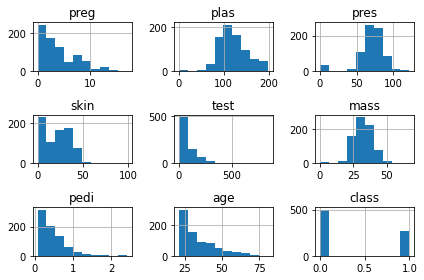

In [10]:
import matplotlib.pyplot as plt

### STUDENT CODE HERE
data.hist()
plt.tight_layout()
plt.show()
### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 1.3.7:</b> Welche Aussagen können Sie mithilfe der Histogramme treffen? Trifft dies auf die Erkenntnisse des vorherigen Kapitels zu?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div> Einige Features sind ähnlich verteilt, andere scheinen korreliert zu sein.


### Dichtediagramme

Allgemein funktionieren Dichtediagramme ähnlich wie Histogramme. Im Gegensatz zu Histogrammen ist der Verlauf in Dichtediagrammen allerdings glatter, da sie nicht ausschließlich auf der Häufigkeit des Auftretens der Werte beruhen.

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.8:</b> Finden Sie heraus, wie ein Dichtediagramm (density plot) erzeugt werden kann. Geben Sie ein Dichtediagramm pro Feature aus. Sie können dazu Methoden von Pandas verwenden.
</div>

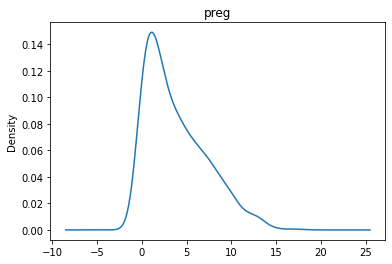

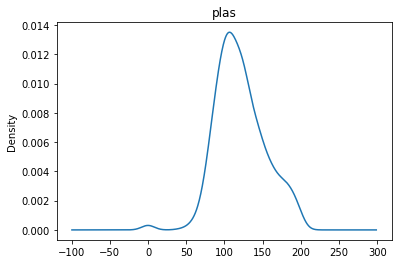

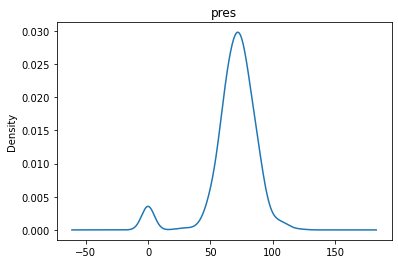

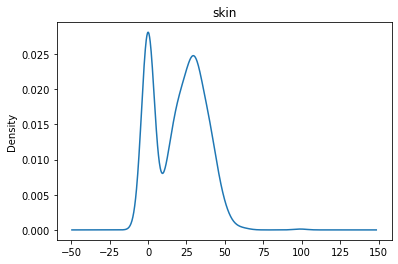

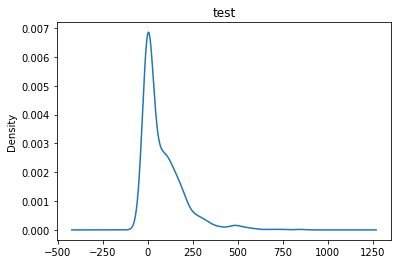

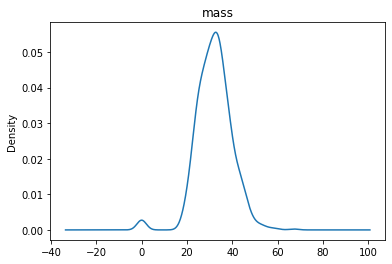

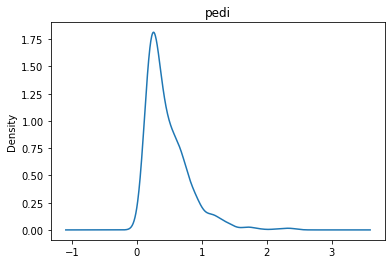

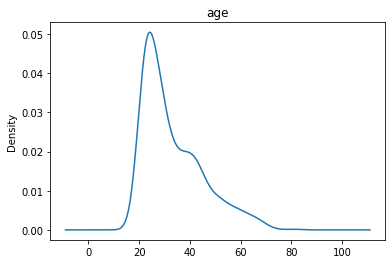

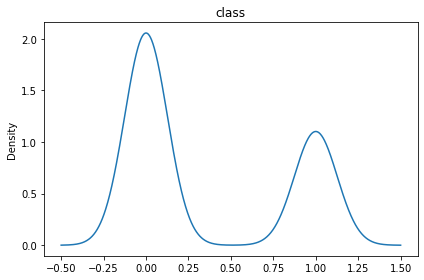

In [15]:
### STUDENT CODE HERE

for i in data.columns:
    plt.figure()
    data[i].plot.kde()
    plt.title(i)
plt.tight_layout()
plt.show()
### STUDENT CODE until HERE

### Box- und Whisker Plots

Ein weiterer Weg, Daten zu visualisieren sind sogenannte _boxplots_. Dieses mögen beim ersten Betrachten vielleicht unverständlich erscheinen. Ein Boxplot zeigt den Median mit einem Strich in einer Box. Das obere und das untere Ende der Box geben das 25. bzw. das 75. Perzentil an. Eine weitere Linie zeigt den gesamten Umfang der Daten an (https://en.wikipedia.org/wiki/Box_plot).

Die sogenannten Whiskers geben die Streuung der Daten an. Die Punkte symbolisieren zudem Ausreißer, also Werte die 1.5 Mal größer als der Interquartilsabstand (IQR) sind. Der IQR ist der Abstand zwischen dem oberen Whisker (Q3) und dem unteren Whisker (Q1).

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.9:</b> Visualisieren Sie alle Features mithilfe von Box Plots. Sie können dazu Methoden von Pandas verwenden.
</div>

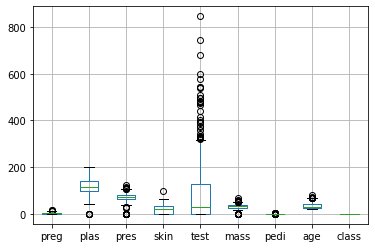

In [16]:
### STUDENT CODE HERE
boxplot = data.boxplot()
### STUDENT CODE until HERE

### Mehrdimensionale Plots

#### Korrelationsmatrix Plot

Wie bereits zuvor erwähnt, beschreibt die Korrelation den Zusammenhang zwischen zwei Variablen. Falls Sie diese bereits berechnet haben, können Sie sie nun visualisieren, um einen schnellen Überblick über die Korrelation zwischen den Variablen zu erhalten. Es ist wichtig, stark korrelierte Attribute zu finden, das diese die Performanz mancher Algorithmen schwächen können.


<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.10:</b> Erstellen Sie eine Heatmap. Diese gibt Ihnen einen guten Überblick über die Korrelationen Ihrer Daten.
</div>

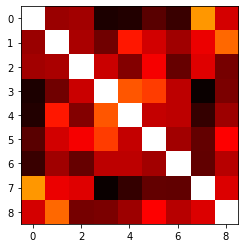

In [17]:
### STUDENT CODE HERE
plt.imshow(correlations, cmap='hot')
### STUDENT CODE until HERE

Na also, schon haben Sie einen schnellen Überblick über Ihre Daten! 

Es scheint als wären alle Variablen positiv korreliert. Wenn Sie herauszufinden möchten, welcher Korrelationskoeffizient zu welchem Attribut gehört, können Sie Ihren Code anpassen und Achsenbeschriftungen hinzufügen. Manchmal kann es auch hilfreich sein, die einzelnen Zellen der Heatmap direkt mit Werten zu beschriften.

#### Streudiagramm-Matrix (Scatter Plot Matrix)

Die Streudiagramm-Matrix ist eine der letzten Methoden, die wir euch vorstellen werden. Ein Streudiagramm zeigt den Zusammenhang zwischen zwei Variablen als Punkte im zweidimensionalen Raum mit jeweils einer Achse pro Attribut. Generiert man ein Streudiagramm pro Attribut nennt man dies eine _Streudiagramm-Matrix_. Ein Vorteil dieser Matrix ist, dass strukturelle Zusammenhänge zwischen Attributen leicht erkannt werden können. Diese könnten eine Korrelation bedeuten. 

<div class="alert alert-block alert-success">
<b>Aufgabe 1.3.11:</b> Plotten Sie eine solche Matrix
</div>
<div class="alert alert-block alert-success">
<b>Frage 1.3.12:</b> Was kann man an diesem Plot erkennen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


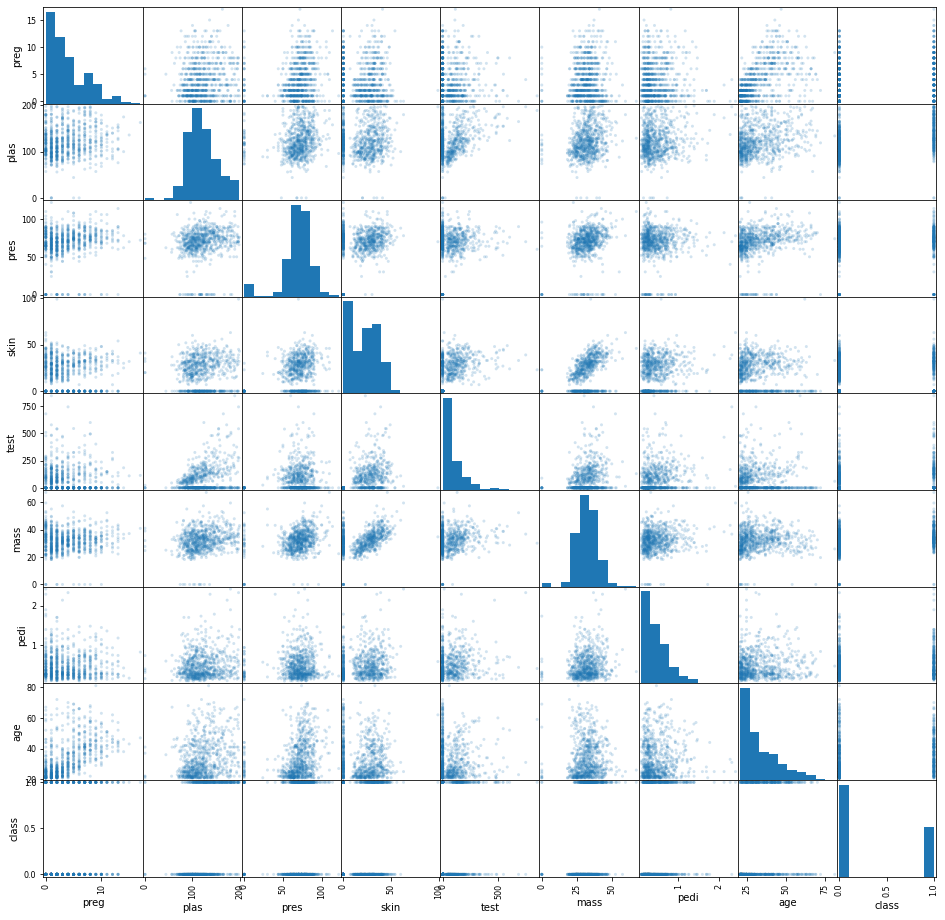

In [23]:
from pandas.plotting import scatter_matrix

### STUDENT CODE HERE
scatter_matrix(data, alpha=0.2,figsize=[16,16])
### STUDENT CODE until HERE
plt.show()

## Schiefe eindimensionaler Verteilungen

Viele Machine Learning Algorithmen können besser mit Normal- oder Gaußverteilungen (https://en.wikipedia.org/wiki/Normal_distribution) umgehen. Wenn Ihre Daten allerdings einer schiefen Normalfunktion folgen, kann es sinnvoll sein, dies in der Datenaufbereitung zu beheben. Lasst uns die Schiefe unseres Datensatzes betrachten. Dies kann in Pandas mit der `skew()` Funktion erreicht werden.
<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 1.3.13:</b> Berechnen Sie die Schiefe der Diabetesdaten. Speichern Sie diese in der Variablen <code>skew</code> und beschreiben Sie Ihre Beobachtungen mit Hilfe der Schiefe Werte. Siehe auch: https://en.wikipedia.org/wiki/Skewnes
</div>


<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [24]:
### STUDENT CODE HERE
skew = data.skew()
### STUDENT CODE until HERE

print(skew)

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64
